# COVID Project

## 데이터 분석 처리 절차
 - 문제의 정의
 - 데이터 수집
 - 데이터 전처리 및 가공
 - 데이터 시각화 및 통찰 도출
 

# 문제의 정의
 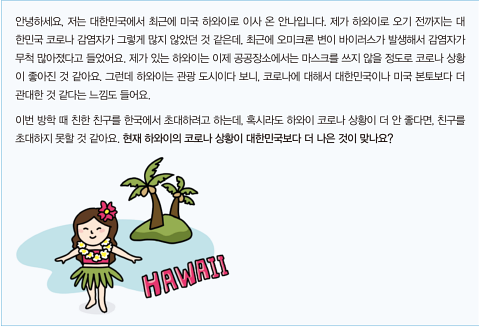

## 기대 결과
- 대한민국과 하와이의 확진자 현황을 보여주는 그래프 생성
- 일자별 총 인구 대비 확진자 수 비율의 변화 추이

# 데이터 수집

## 적절한 데이터 인가?
- 포괄성 : 필요한 데이터를 포함하고 있는가?
- 최신성 : 최신 데이터를 포함하고 있는가?
- 정확성 : 정확한 데이터를 포함하고 있는가?
- 일관성 : 데이터의 형태가 일관되어 있는가?
- 신뢰성 : 왜곡이 없고 신뢰할 수 있는 데이터 인가?
- 사용성 : 사용하기 편리한가?

## 데이터의 검색 및 다운로드
- Google에서 OWID(Our World in Data, https://ourworldindata.org/ )검색
- Main page의 상단 Explore Our COVID-19 Data
- 왼쪽 상단 COVID-19 dataset 클릭
- Github, README.md 파일에 Download our complete COVID-19 dataset에서 CSV 클릭
- owid-covid-data.csv 


# 데이터 전처리 및 가공

## 데이터 읽어 오기

In [1]:
import pandas as pd

pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 2e218d10984e9919f0296931d92ea851c6a6faf5
python           : 3.10.11.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.10.147+
Version          : #1 SMP Sat Dec 10 16:00:40 UTC 2022
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.5.3
numpy            : 1.22.4
pytz             : 2022.7.1
dateutil         : 2.8.2
setuptools       : 67.7.2
pip              : 23.0.1
Cython           : 0.29.34
pytest           : 7.2.2
hypothesis       : None
sphinx           : 3.5.4
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.2
html5lib         : 1.1
pymysql          : None
psycopg2         : 2.9.6
jinja2           : 3.1.2
IPython          : 7.34.0
pandas_datareader: 0.10.0
bs4              : 4.11.2
bottleneck       : None
brotli           

In [2]:
#Google Drive에 연결 : 왼쪽 폴더 이미지 클릭 

!pwd

/content


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# CSV파일 읽어 오기
# 읽어 오려는 파일 오른쪽 클릭해서 '경로복사'

raw_df = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244337 entries, 0 to 244336
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    244337 non-null  object 
 1   continent                                   230598 non-null  object 
 2   location                                    244337 non-null  object 
 3   date                                        244337 non-null  object 
 4   total_cases                                 230319 non-null  float64
 5   new_cases                                   230041 non-null  float64
 6   new_cases_smoothed                          228842 non-null  float64
 7   total_deaths                                210886 non-null  float64
 8   new_deaths                                  210803 non-null  float64
 9   new_deaths_smoothed                         209617 non-null  float64
 

In [5]:
raw_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [6]:
raw_df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
244332,ZWE,Africa,Zimbabwe,2022-12-17,259356.0,0.0,0.000,5622.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
244333,ZWE,Africa,Zimbabwe,2022-12-18,259356.0,0.0,0.000,5622.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
244334,ZWE,Africa,Zimbabwe,2022-12-19,259356.0,0.0,0.000,5622.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
244335,ZWE,Africa,Zimbabwe,2022-12-20,259981.0,625.0,89.286,5637.0,15.0,2.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
244336,ZWE,Africa,Zimbabwe,2022-12-21,259981.0,NaN,NaN,5637.0,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


## 원하는 열 추려내기

### 열 항목 확인 및 수정된 데이터 프레임 생성
- iso_code : 국제 표준 국가 코드
- location : 국가 이름
- date : 일자
- total_cases : 전체 확진자 수
- population : 인구

In [7]:
#원하는 열 list만들기 (df : data frame)
selected_columns = ['iso_code', 'location', 'date', 'total_cases', 'population']

#원하는 열을 추출한 데이터프레임 생성
revised_df = raw_df[selected_columns]

#수정된 데이터프레임 확인
revised_df.head()

,iso_code,location,date,total_cases,population
0,AFG,Afghanistan,2020-02-24,5.0,41128772.0
1,AFG,Afghanistan,2020-02-25,5.0,41128772.0
2,AFG,Afghanistan,2020-02-26,5.0,41128772.0
3,AFG,Afghanistan,2020-02-27,5.0,41128772.0
4,AFG,Afghanistan,2020-02-28,5.0,41128772.0


### 유일한 데이터 추출

- Method : unique()

In [8]:
# location 열 추출
location = raw_df['location']
location

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
244332       Zimbabwe
244333       Zimbabwe
244334       Zimbabwe
244335       Zimbabwe
244336       Zimbabwe
Name: location, Length: 244337, dtype: object

In [9]:
#location열의 유일한 값 확인
location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswat

In [10]:
kor_total_df = raw_df[raw_df.location=='South Korea']
kor_total_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
203696,KOR,Asia,South Korea,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
203697,KOR,Asia,South Korea,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
203698,KOR,Asia,South Korea,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
203699,KOR,Asia,South Korea,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
203700,KOR,Asia,South Korea,2020-01-26,3.0,1.0,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,43.4,0.17,2.47,0.837582


In [11]:
## South Korea 데이터 프레임 생성

kor_df = revised_df[revised_df.location=='South Korea']

kor_df.head()

,iso_code,location,date,total_cases,population
203696,KOR,South Korea,2020-01-22,1.0,51815808.0
203697,KOR,South Korea,2020-01-23,1.0,51815808.0
203698,KOR,South Korea,2020-01-24,2.0,51815808.0
203699,KOR,South Korea,2020-01-25,2.0,51815808.0
203700,KOR,South Korea,2020-01-26,3.0,51815808.0


In [12]:
## United States 데이터 프레임 생성

usa_df = revised_df[revised_df.location=='United States']

usa_df.head()

,iso_code,location,date,total_cases,population
229641,USA,United States,2020-01-22,1.0,338289856.0
229642,USA,United States,2020-01-23,1.0,338289856.0
229643,USA,United States,2020-01-24,2.0,338289856.0
229644,USA,United States,2020-01-25,2.0,338289856.0
229645,USA,United States,2020-01-26,5.0,338289856.0


### index 변경
- Method : set_index()

In [13]:
# date로 index변경

kor_date_index_df = kor_df.set_index('date')
usa_date_index_df = usa_df.set_index('date')


In [14]:
kor_date_index_df.head()

,iso_code,location,total_cases,population
date,,,,
2020-01-22,KOR,South Korea,1.0,51815808.0
2020-01-23,KOR,South Korea,1.0,51815808.0
2020-01-24,KOR,South Korea,2.0,51815808.0
2020-01-25,KOR,South Korea,2.0,51815808.0
2020-01-26,KOR,South Korea,3.0,51815808.0


In [15]:
usa_date_index_df.head()

,iso_code,location,total_cases,population
date,,,,
2020-01-22,USA,United States,1.0,338289856.0
2020-01-23,USA,United States,1.0,338289856.0
2020-01-24,USA,United States,2.0,338289856.0
2020-01-25,USA,United States,2.0,338289856.0
2020-01-26,USA,United States,5.0,338289856.0


# 데이터 시각화
- Pandas chart visualization 참조
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


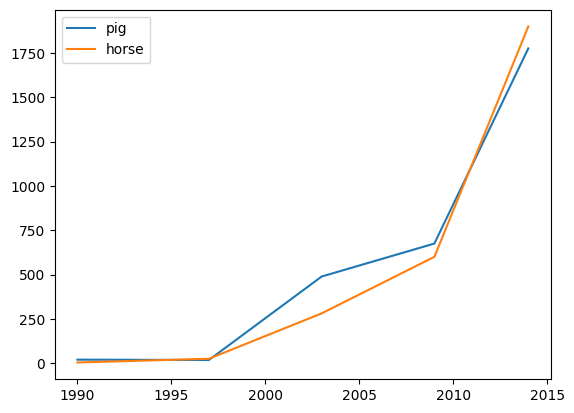

In [16]:
# 그래프 작성 예

df = pd.DataFrame({
    'pig' : [20, 18, 489, 675, 1776],
    'horse' : [4, 25, 281, 600, 1900],
    }, index=[1990, 1997, 2003, 2009, 2014])

lines = df.plot.line()

In [17]:
kor_total_cases = kor_date_index_df['total_cases']
kor_total_cases

date
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           3.0
                 ...    
2022-12-17    28188293.0
2022-12-18    28214915.0
2022-12-19    28302474.0
2022-12-20    28390646.0
2022-12-21    28466390.0
Name: total_cases, Length: 1065, dtype: float64

In [18]:
usa_total_cases = usa_date_index_df['total_cases']
usa_total_cases

date
2020-01-22            1.0
2020-01-23            1.0
2020-01-24            2.0
2020-01-25            2.0
2020-01-26            5.0
                 ...     
2022-12-17     99898101.0
2022-12-18     99903000.0
2022-12-19     99960973.0
2022-12-20    100014301.0
2022-12-21    100184506.0
Name: total_cases, Length: 1065, dtype: float64

In [19]:
final_df = pd.DataFrame({
    'KOR' : kor_total_cases,
    'USA' : usa_total_cases
    }, index=kor_date_index_df.index)

final_df.head()

,KOR,USA
date,,
2020-01-22,1.0,1.0
2020-01-23,1.0,1.0
2020-01-24,2.0,2.0
2020-01-25,2.0,2.0
2020-01-26,3.0,5.0


<Axes: xlabel='date'>

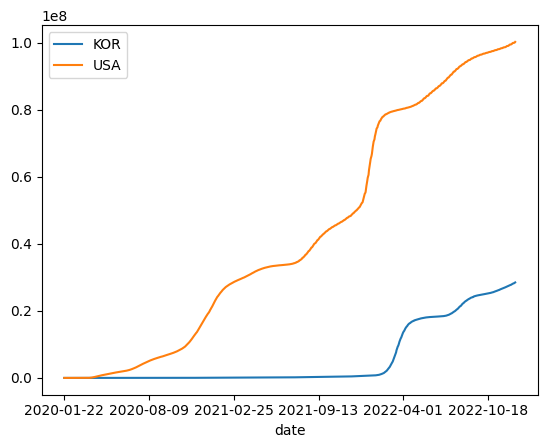

In [20]:
# .plot.line() 함수를 이용해서 선 그래프 그리기
final_df.plot.line()

<Axes: xlabel='date'>

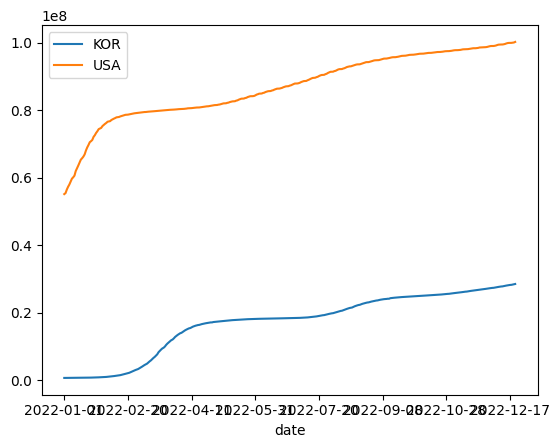

In [21]:
#원하는 X축의 범쉬 설정 : 슬라이싱
final_df['2022-01-01':].plot.line()

<Axes: xlabel='date'>

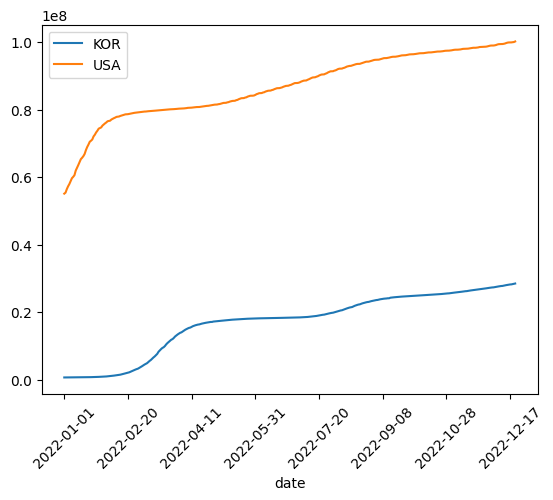

In [22]:
# X축에 각도 넣기
final_df['2022-01-01':].plot.line(rot=45)

## 확진자 비율 구하기

In [23]:
kor_population = kor_date_index_df['population']['2020-01-22']

usa_population = usa_date_index_df['population']['2020-01-22']

print('미국 인구(', usa_population, ') / 대한민국 인구(', kor_population, ')')

미국 인구( 338289856.0 ) / 대한민국 인구( 51815808.0 )


In [24]:
# 인구비율 구하기

rate = round((usa_population/kor_population), 2)
rate

6.53

In [25]:
#확진자 비율을 적용한 최종 데이터 프레임 생성

final_revised_df = pd.DataFrame({
    'KOR' : kor_total_cases * rate,
    'USA' : usa_total_cases
    }, index=kor_date_index_df.index)

final_revised_df.head()

,KOR,USA
date,,
2020-01-22,6.53,1.0
2020-01-23,6.53,1.0
2020-01-24,13.06,2.0
2020-01-25,13.06,2.0
2020-01-26,19.59,5.0


<Axes: xlabel='date'>

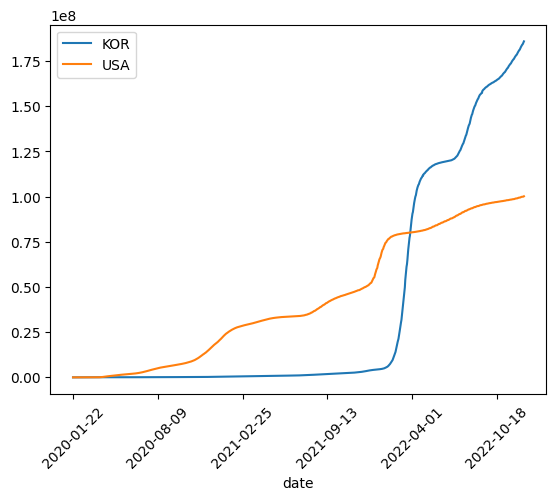

In [26]:
final_revised_df[:].plot.line(rot=45)

<Axes: xlabel='date'>

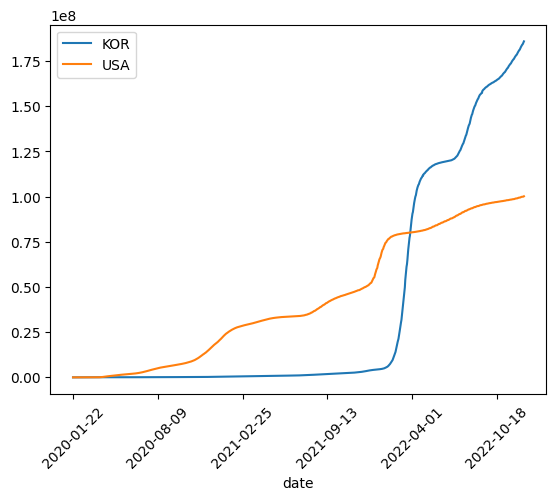

In [27]:
final_revised_df['2020-01-01':].plot.line(rot=45)

# 과제

1. 본인이 문제를 2개를 만들어서 각 문제에 대한 설명 및 코드 작성

1. 문제의 정의 : 현재 대한민국은 '서울공화국'이라 불릴 정도로 서울과 비수도권의 인구 차이가 심하게 존재합니다. 이를 해결하기 위해 그동안 정부는 서울에 집중되어있는 인구를 타 지역으로 이동시키기 위한 맣은 정책을 펼쳤습니다. 하지만 인구만 이동시키면 안 되고 직장, 교육, 인프라 등 비수도권 지역에 투자가 필요합니다. 
서울에서 비수도권 지역별로 이동하는 인구수를 분석하여 지역별 투자금을 어떻게 분배해야 할지 궁금합니다. 

데이터 수집 : 대한민국 통계청에서 '시도별 전출입 인구수.xlsx'라는 파일을 사용합니다.

데이터 전처리 및 가공

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload

#파일 불러오기
dfp = pd.read_excel('시도별 전출입 인구수.xlsx', header = 0)

#빈칸은 이전값으로 대체
dfp = dfp.fillna(method = 'ffill')

#서울에서 비수도권 지역만 비교
mask = (dfp['전출지별'] == '서울특별시') & (dfp['전입지별'] != '서울특별시')
dfp_seoul = dfp[mask]
dfp_seoul = dfp_seoul.drop(['전출지별'], axis = 1)
dfp_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True)
dfp_seoul.set_index('전입지', inplace = True)
col_years = list(map(str, range(1970, 2018)))
df = dfp_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

데이터 시각화 및 통찰 도출

In [29]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

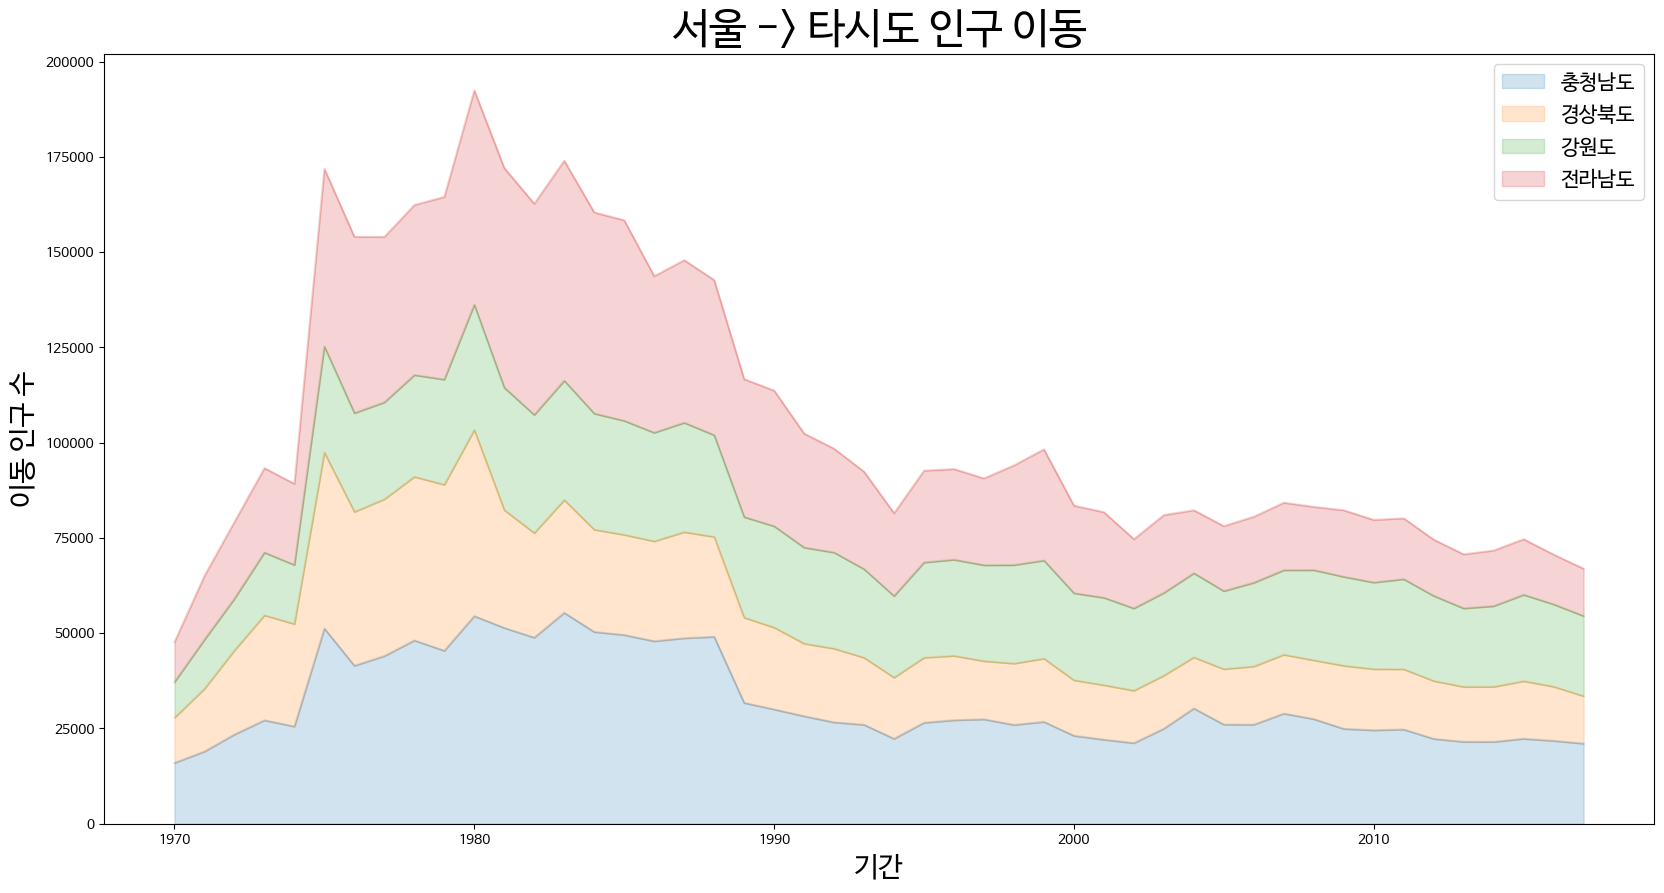

In [30]:
df_2 = df.transpose()
df_2.plot(kind = 'area', stacked = True, alpha = 0.2, figsize = (20, 10))

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size = 20)
plt.xlabel('기간', size = 20)
plt.legend(loc='best', fontsize = 15)

plt.show()

결론: 예산을 편성할 때 전라남도, 강원도, 경상북도, 충청도 순으로 예산을 편성하지만 해가 지남에 따라 이동인구가 감소하므로 과거 지원 예산에 비해 크게 늘릴필요는 없다.

2. 문제의 정의 : 코로나-19로 인해 '코로나 블루'라는 현상이 생겼습니다. 이는 코로나로 인하여 정적이고 답답하게 변한 일상에 의해 생긴 우울증입니다. 이처럼 현대사회에서 정신질환을 앓는 사람들은 늘어나고 있습니다. 정신질환을 치료할 목적으로 음악을 듣는 사람들이 많습니다. 하지만 음악이 실제로 도움이 되는지, 도움이 된다면 어떤 음악을 들어야 치료 효과를 극대화 할 수 있는지 궁금합니다.

데이터 수집 : University of Washington, Computer Science에서 조사한 'mxmh_survey_results.csv'을 사용했습니다.

데이터 전처리 및 가공

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('mxmh_survey_results.csv')

#필요없는 데이터 삭제
data.drop(['Timestamp', 'Age',  'Primary streaming service', 'Exploratory', 'Foreign languages', 'Permissions'], axis=1, inplace=True)
data.drop(data.iloc[:, 6:22], inplace = True, axis=1)

#비슷한 데이터 묶기기
data['While working'] = data['While working'].fillna(data['While working'].mode()[0])
data['Instrumentalist'] = data['Instrumentalist'].fillna(data['Instrumentalist'].mode()[0])
data.rename(columns = {'Instrumentalist':'Musician'}, inplace = True)
data['Musician'] = np.where((data['Musician'] == 'Yes') | (data['Composer'] == 'Yes'), 'Yes', 'No')
data.drop(['Composer'], axis=1, inplace=True)

#null 데이터 삭제
data = data.dropna(subset=['BPM', 'Music effects'])

#신뢰성 낮은 데이터 삭제
data_index = data[data['BPM'] > 220].index
data = data.drop(data_index, axis=0)
data_index = data[data['BPM'] < 50].index
data = data.drop(data_index, axis=0)
data_index = data[data['Hours per day'] >= 15].index
data = data.drop(data_index, axis=0)
data_index = data[data['Hours per day'] < 1].index
data = data.drop(data_index, axis=0)
data['Hours per day'].sort_values(ascending=False, na_position='last')
data_index = data[data['Fav genre'] == 'Latin'].index
data = data.drop(data_index, axis=0)
data_index = data[data['Fav genre'] == 'Gospel'].index
data = data.drop(data_index, axis=0)

데이터 시각화 및 통찰 도출

<ipython-input-32-0b09326c4be5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_effect_count = data_effect_count.groupby(['Music effects']).sum()


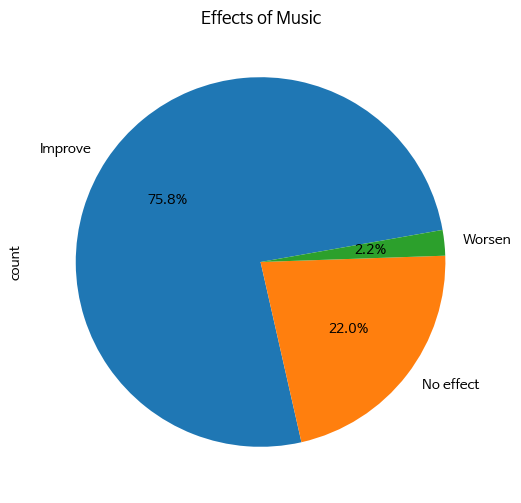

In [32]:
data_effect_count = data.assign(count=1)
data_effect_count = data_effect_count.groupby(['Music effects']).sum()
data_effect_count['count'].plot(kind='pie', figsize=(6,6), autopct="%1.1f%%", startangle=10)
plt.title('Effects of Music')
plt.show()

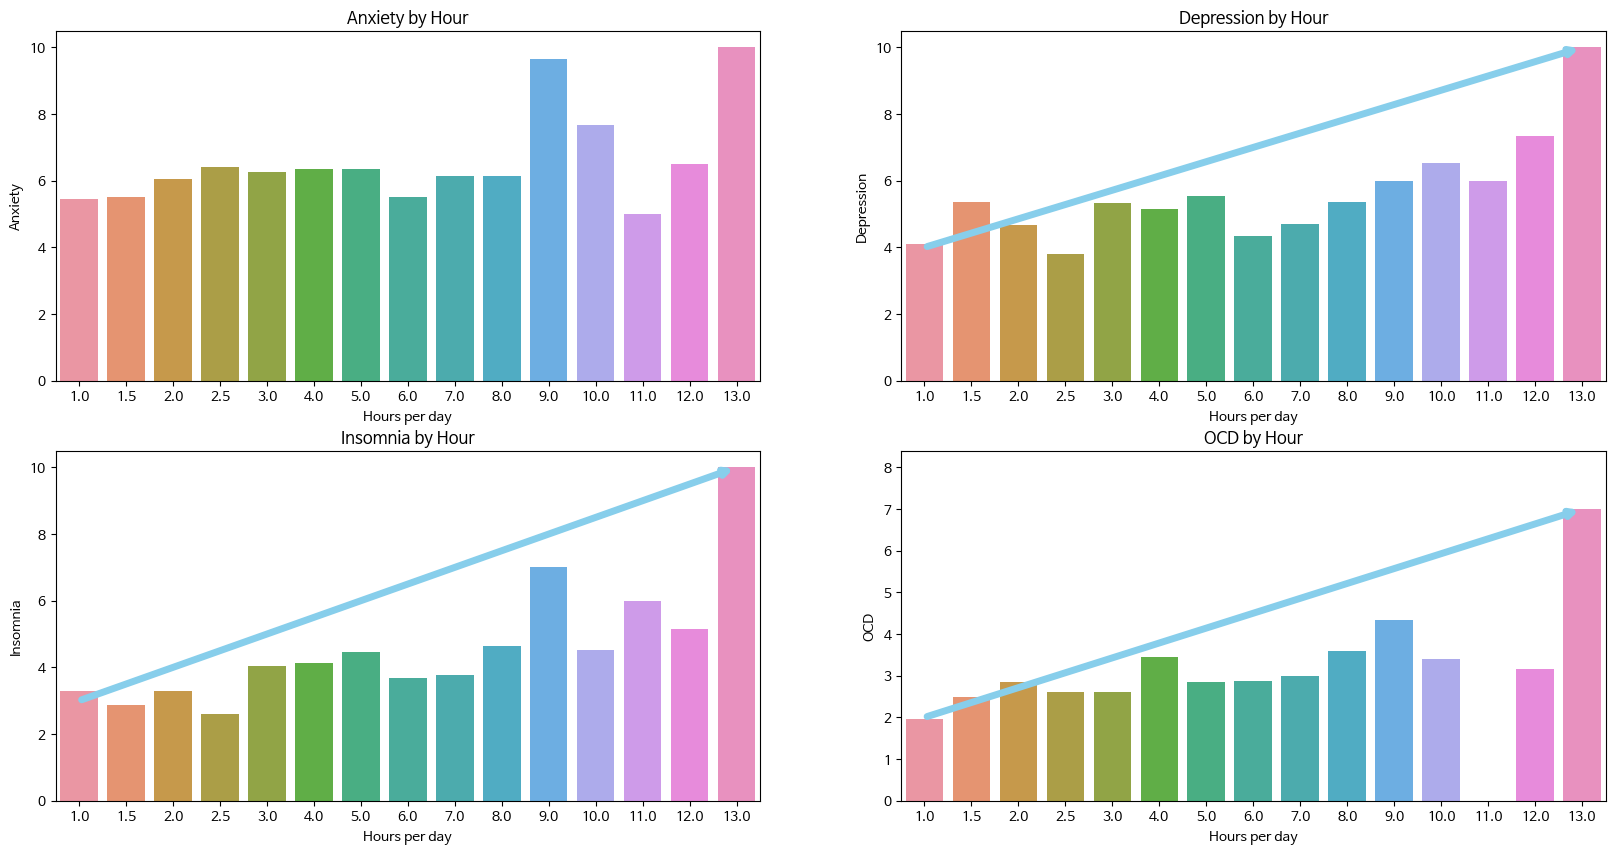

In [33]:
mask = (data['Music effects'] == 'Improve')
data_hour = data[mask]

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.barplot(x=(data_hour['Hours per day']), y=data_hour['Anxiety'], errwidth=0, ax = ax1)
sns.barplot(x=(data_hour['Hours per day']), y=data_hour['Depression'], errwidth=0, ax = ax2)
sns.barplot(x=(data_hour['Hours per day']), y=data_hour['Insomnia'], errwidth=0, ax = ax3)
sns.barplot(x=(data_hour['Hours per day']), y=data_hour['OCD'], errwidth=0, ax = ax4)

ax2.annotate('', xy = (14, 10), xytext = (0, 4), xycoords = 'data',
             arrowprops = dict(arrowstyle = '->', color = 'skyblue', lw = 5))
ax3.annotate('', xy = (14, 10), xytext = (0, 3), xycoords = 'data',
             arrowprops = dict(arrowstyle = '->', color = 'skyblue', lw = 5))
ax4.annotate('', xy = (14, 7), xytext = (0, 2), xycoords = 'data',
             arrowprops = dict(arrowstyle = '->', color = 'skyblue', lw = 5))

ax1.set_title('Anxiety by Hour')
ax2.set_title('Depression by Hour')
ax3.set_title('Insomnia by Hour')
ax4.set_title('OCD by Hour')

plt.show()

<ipython-input-34-8b3b3db9dc47>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_genre = data_genre.groupby('Fav genre', as_index=False).mean()


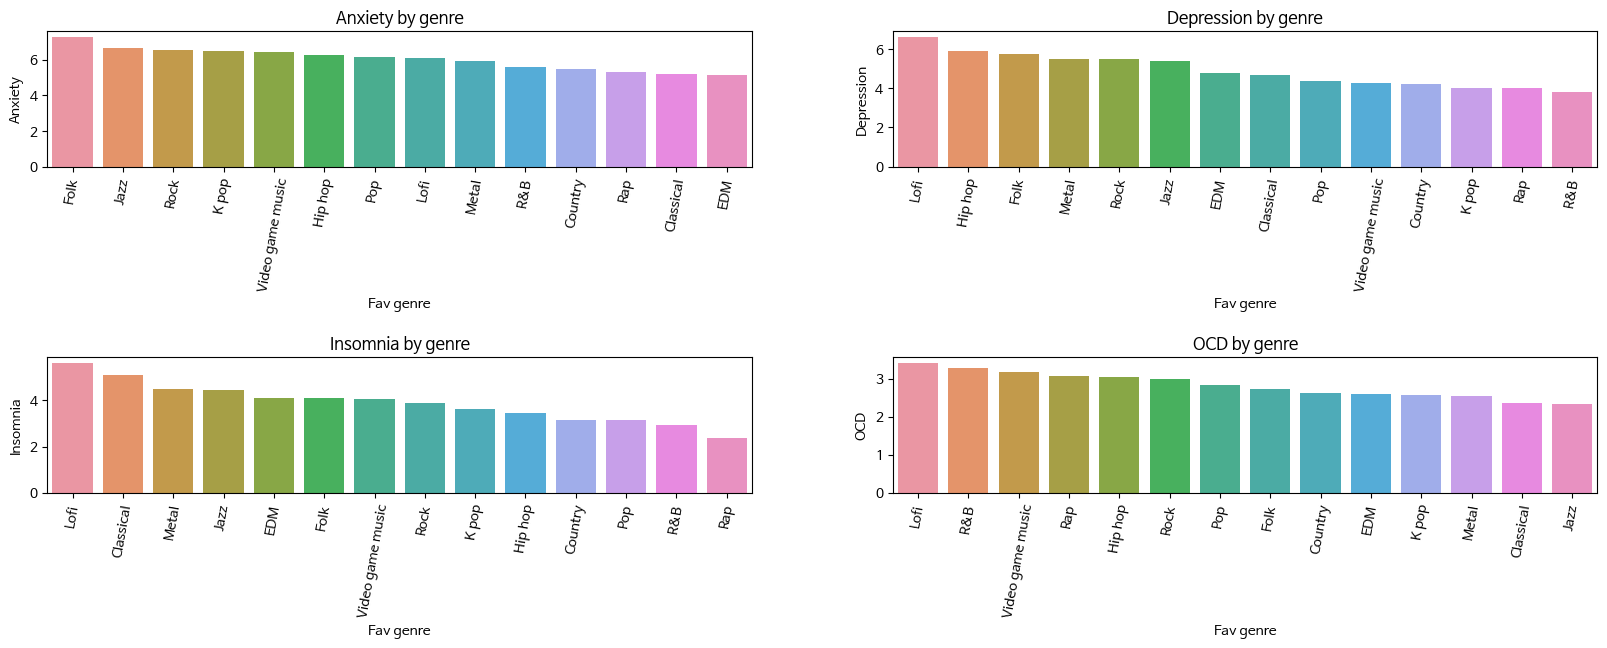

In [34]:
mask = (data['Music effects'] == 'Improve')
data_genre = data[mask]
data_genre = data_genre.groupby('Fav genre', as_index=False).mean()

fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 5)
ax4 = fig.add_subplot(3, 2, 6)

data_genre_A = data_genre.sort_values('Anxiety', ascending = False)
data_genre_D = data_genre.sort_values('Depression', ascending = False)
data_genre_I = data_genre.sort_values('Insomnia', ascending = False)
data_genre_O = data_genre.sort_values('OCD', ascending = False)

sns.barplot(x=(data_genre_A['Fav genre']), y=data_genre_A['Anxiety'], errwidth=0, ax = ax1)
sns.barplot(x=(data_genre_D['Fav genre']), y=data_genre_D['Depression'], errwidth=0, ax = ax2)
sns.barplot(x=(data_genre_I['Fav genre']), y=data_genre_I['Insomnia'], errwidth=0, ax = ax3)
sns.barplot(x=(data_genre_O['Fav genre']), y=data_genre_O['OCD'], errwidth=0, ax = ax4)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=80)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=80)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=80)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=80)

ax1.set_title('Anxiety by genre')
ax2.set_title('Depression by genre')
ax3.set_title('Insomnia by genre')
ax4.set_title('OCD by genre')

plt.show()